<Strong> Dogs and Cats Few Examples , CNN </Strong>

In [102]:
import os, shutil
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [103]:
#original_dataset_dir = '/Users/jackyboy/Downloads/kaggle_original_data/train'

In [104]:
#base_dir = '/Users/jackyboy/Downloads/cats_and_dogs_small'
#os.mkdir(base_dir)

In [105]:
#train_dir = os.path.join(base_dir, 'train')
#os.mkdir(train_dir)

validation_dir = '/Users/jackyboy/Downloads/cats_and_dogs_small/validation'
#validation_dir = os.path.join(base_dir, 'validation')
#os.mkdir(validation_dir)

#test_dir = os.path.join(base_dir, 'test')
#os.mkdir(test_dir)

In [106]:
train_cats_dir = '/Users/jackyboy/Downloads/cats_and_dogs_small/train/cats'
#os.mkdir(train_cats_dir)

train_dogs_dir = '/Users/jackyboy/Downloads/cats_and_dogs_small/train/dogs'
#train_dogs_dir = os.path.join(train_dir, 'dogs')
#os.mkdir(train_dogs_dir)

In [107]:
validation_cats_dir = '/Users/jackyboy/Downloads/cats_and_dogs_small/validation/cats'
#validation_cats_dir = os.path.join(validation_dir, 'cats')
#os.mkdir(validation_cats_dir)

validation_dogs_dir ='/Users/jackyboy/Downloads/cats_and_dogs_small/validation/dogs'
#validation_dogs_dir = os.path.join(validation_dir, 'dogs')
#os.mkdir(validation_dogs_dir)

In [108]:
test_cats_dir = '/Users/jackyboy/Downloads/cats_and_dogs_small/test/cats'
#test_cats_dir = os.path.join(test_dir, 'cats')
#os.mkdir(test_cats_dir)

test_dogs_dir = '/Users/jackyboy/Downloads/cats_and_dogs_small/test/dogs'
#test_dogs_dir = os.path.join(test_dir, 'dogs')
#os.mkdir(test_dogs_dir)

<Strong> First 1000 cat images to train folder. </Strong>

In [109]:
#fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
#for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
#    dst = os.path.join(train_cats_dir, fname)
#    shutil.copyfile(src, dst)

<Strong> 500 Images to the validation set for cats . </Strong>

In [110]:
#fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
#for fname in fnames:
#    src = os.path.join(original_dataset_dir , fname)
#    dst = os.path.join(validation_cats_dir, fname)
#    shutil.copyfile(src, dst)

<Strong> 500 images for testing. </Strong>

In [111]:
#fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
#for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
#    dst = os.path.join(test_cats_dir, fname)
#    shutil.copyfile(src, dst)

<Strong> Dog 1000 train images. <Strong>

In [112]:
#fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
#for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
#    dst = os.path.join(train_dogs_dir, fname)
#    shutil.copyfile(src, dst)

In [113]:
#fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
#for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
#    dst = os.path.join(validation_dogs_dir, fname)
#    shutil.copyfile(src, dst)

In [114]:
#fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
#for fname in fnames:
#    src = os.path.join(original_dataset_dir, fname)
#    dst = os.path.join(test_dogs_dir, fname)
#   shutil.copyfile(src, dst)

In [115]:
print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(test_cats_dir)))

print(len(os.listdir(train_dogs_dir)))
print(len(os.listdir(validation_dogs_dir)))
print(len(os.listdir(test_dogs_dir)))

1000
500
500
1000
500
500


<Strong> Because the sample images are bigger and problem is more complex , the network will be bigger. </Strong>

<Strong> The debth of feature map increases , whereas the size of feature map decreases. </Strong>

<Strong> Binary classification , so sigmoid activation as output. </Strong>

In [116]:
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [117]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [118]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

In [119]:
model.compile(loss='binary_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['acc'])

<Strong> 
    1.Decode the JPEG content to RGB grids of pixels.
    2.Convert these into floating-point tensors.
    3.Rescale the pixel values (between 0 and 255) to the [0, 1] interval (as you know,
neural networks prefer to deal with small input values). 

</Strong>

<Strong> Using image generator to convert Images to Matrix </Strong>

In [120]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [121]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [122]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

Found 1000 images belonging to 2 classes.


<Strong> 20 samples per batch , infinite loop we need to break.</Strong>

In [123]:
for data_batch, labels_batch in train_generator:
     print('data batch shape:', data_batch.shape ,'labels batch shape:', labels_batch.shape )
     break

data batch shape: (20, 150, 150, 3) labels batch shape: (20,)


<Strong> Fitting the Model using generator  </Strong>

<Strong> How many batches to take out of generator before declaring epoch over. 
         steps_per_epoch = Gradient Descent steps . Batches are 20 and there are 2000 samples so 20 * 100(steps_per_epoch)</Strong>

In [50]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30


/var/folders/_f/jpr9q2w52wzg1v439ryj1bk00000gn/T/ipykernel_73388/3259228942.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 38s 377ms/step - loss: 0.6903 - acc: 0.5375 - val_loss: 0.6761 - val_acc: 0.5200
Epoch 2/30
100/100 [==============================] - 34s 341ms/step - loss: 0.6568 - acc: 0.6105 - val_loss: 0.6429 - val_acc: 0.6320
Epoch 3/30
100/100 [==============================] - 36s 365ms/step - loss: 0.6136 - acc: 0.6610 - val_loss: 0.6220 - val_acc: 0.6440
Epoch 4/30
100/100 [==============================] - 35s 352ms/step - loss: 0.5774 - acc: 0.6895 - val_loss: 0.6117 - val_acc: 0.6470
Epoch 5/30
100/100 [==============================] - 35s 350ms/step - loss: 0.5363 - acc: 0.7260 - val_loss: 0.6573 - val_acc: 0.6280
Epoch 6/30
100/100 [==============================] - 35s 354ms/step - loss: 0.5046 - acc: 0.7495 - val_loss: 0.5886 - val_acc: 0.6900
Epoch 7/30
100/100 [==============================] - 37s 375ms/step - loss: 0.4731 - acc: 0.7775 - val_loss: 0.6126 - val_acc: 0.6970
Epoch 8/30
100/100 [==============================] - 35s 349ms/st

In [58]:
model.save('cats_and_dogs_small_1.h5')


<Strong> Plotting Loss and accuracy over the validation and training set. </Strong>

In [61]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

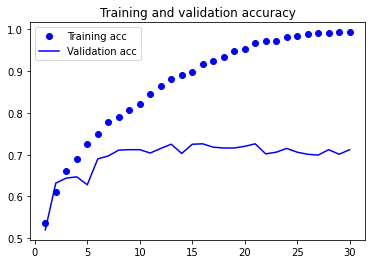

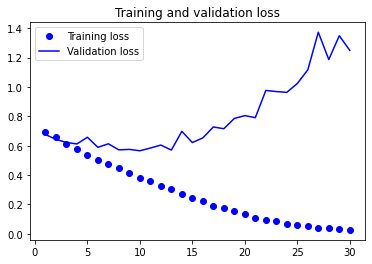

In [62]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

<Strong> Overfitting. The training accuracy increases linearly over time, until it reaches nearly 100%, whereas the validation accuracy stalls at 70–72%. The validation loss reaches its minimum after only five epochs and then stalls, whereas the training loss keeps decreasing linearly until it reaches nearly 0.
Because you have relatively few training samples (2,000), overfitting will be your number-one concern. </Strong>

<Strong> Data Augmentation </Strong>

<Strong> Adding a drop-out layer. - overcome overfitting. </Strong>

In [127]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])


In [ ]:
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

#ImageDataGenerator to scale data then input to our custom generators 

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Test and vali shouldn't be augmented.
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

In [ ]:
model.save('cats_and_dogs_small_2.h5')